In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Train.csv')

In [7]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'reg', 'low fat'], ['LF', 'REG', 'REG', 'LF'])

In [8]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [9]:
average = df['Item_Weight'].mean()

In [10]:
df['Item_Weight'].fillna(value=average, inplace=True)

In [11]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [12]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [13]:
df_real = pd.get_dummies(df, drop_first=True)
df_real

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y =StandardScaler()

In [16]:
X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1, 1)

In [17]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
print(lm.intercept_)
print(lm.coef_)

[0.00089485]
[[-4.47160358e-03 -1.40135301e-02  5.71565395e-01  1.25837318e-02
  -2.72784848e-03  4.46149476e-03  3.86910736e-03 -1.42989369e-02
  -2.11373539e-03  9.17283532e-03  6.88689209e-04  1.90859554e-03
  -2.71870220e-03  7.74086559e-05 -3.75190843e-03  1.16890323e-02
  -2.06490907e-03 -3.77920408e-03  1.78650519e-03 -1.62920011e+11
  -2.21265378e+11  2.33835327e+11 -2.04280962e+11  1.27176951e+11
   1.10252587e+11  1.26996518e+11  1.89020875e+11 -3.70657598e+11
  -3.16887204e+11 -4.98714235e+11 -4.36288119e+11  3.37506377e+11
   1.06186258e+11  2.96181846e+11]]


In [25]:
predicted = sc_y.inverse_transform(lm.predict(X_test))

In [28]:
y_real = sc_y.inverse_transform(y_test)
y_real

array([[1743.0644],
       [ 356.8688],
       [ 377.5086],
       ...,
       [ 629.181 ],
       [ 253.004 ],
       [ 976.7286]])

In [29]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_real, predicted))
print('MSE: ', metrics.mean_squared_error(y_real, predicted))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_real, predicted)))
print('R2 score: ', metrics.r2_score(y_real, predicted))

MAE:  791.9461487701313
MSE:  1143522.215641946
RMSE:  1069.3559817207486
R2 score:  0.5792734328875884


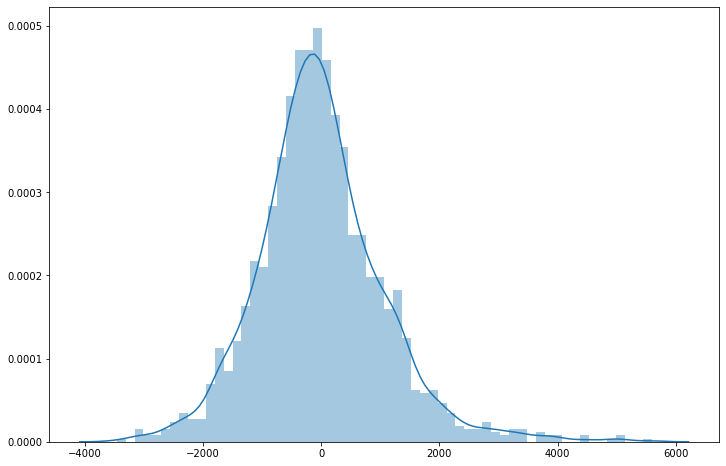

In [32]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12, 8))
sns.distplot((y_real-predicted), bins=60)

In [33]:
dict_compare = {'Sales': y_real.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,1743.0644,1359.507286
1,356.8688,707.005279
2,377.5086,877.186968
3,5778.4782,4229.162160
4,2356.9320,3347.633512
...,...,...
1700,3004.0896,2033.255966
1701,890.8404,2165.735224
1702,629.1810,848.649769
1703,253.0040,565.985692


In [34]:
print(df_predicted.to_string())

           Sales    Predicted
0      1743.0644  1359.507286
1       356.8688   707.005279
2       377.5086   877.186968
3      5778.4782  4229.162160
4      2356.9320  3347.633512
5       865.5400   637.432839
6      4613.9940  4753.246773
7      2410.8618  2047.003813
8      1948.1308  1392.106349
9      1937.4780  2784.596664
10      210.3928  -242.221104
11      255.0014  2118.242660
12     4541.4218  3899.005518
13      657.8104   963.319316
14      578.5802   751.998235
15     4229.1616  4346.435466
16     1267.0174  1787.669417
17     2388.8904  1826.205050
18     1797.6600  1968.370292
19     4447.5440  3239.733738
20     2570.6538  3092.048528
21     1779.6834  2707.837849
22     4211.1850  2850.836293
23     3912.2408  2504.015594
24     2366.9190  4196.667248
25     1298.3100  2264.053164
26      149.8050   709.609038
27     3916.2356  3788.293685
28     2065.3116  3150.164429
29     3029.3900  3879.946002
30      788.3072   814.696752
31     2566.6590  2749.810444
32      57

In [36]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.761383
Predicted,0.761383,1.000000
